# Neural Networks: part I

This is the Google Colaboratory nootebook:
* First you need to click in the Connect button in the upper right part of the screen, then Google Colab would reserve part of its computational resources for your notebook. 
* Each cells of this notebook can be executed by clicking Play button in the left part of each cell, or by typing Shift+Enter.

First we need to import necessary Python libraries for handling data sets and graphics:



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Then, we can import the library for Neural Networks developed by Google named Tensorflow. Moreover, we will utilize multi-layer perceptron network structure. For this end, we need to import 'Sequential' model, which is included in dedicated tensorflow sub-library named Keras:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

From Sequential library we would utilized three types of network layers:
* Flatten - the first layer (serves only to transform n x n image to n*x x 1 data vector)
* Dense   - completely connected layer (*dense layer*)
* Dropout - layer that reset some of network weights - this prevents from overfitting

In [ ]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

### MNIST Dataset - 60 thousands images of handwritten digits

We can load the data set and split it into training and testing parts (original data set has been already split)

In [ ]:
from tensorflow.keras import datasets
(X_train,y_train),(X_test,y_test) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


<font color='#FF9700'><strong>(T.2.1)</font><em> Using '.shape' method try to figure out what are dimensions of our data set samples (hint: X are images, y are class values, hence use X_train.shape, etc.)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Our neural network will process normalized data, hence we need to transform image pixel values [0,255] to unit interval [0,1] by simple division operation:

In [ ]:
X_train = X_train/255.
X_test = X_test/255.

Let us check how some of training set images look like (Is it easy enough to recognize them all?)

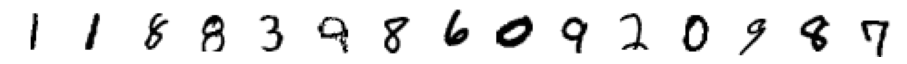

In [ ]:
plt.figure(figsize=(16,16))
for i,j in zip(np.random.randint(0,60000,15),np.arange(15)+1):
    plt.subplot(1,15,j)
    plt.imshow(X_train[i],cmap='gray_r')
    plt.axis('off')
plt.show()

<font color='#FF9700'><strong>(T.2.2)</font><em> Using net.add method try to make our neural network of the following structure:
* Flatten layer ('Flatten()' with input_shape parameter that fits to our image data)
* Dense layer ('Dense()'with more than 100 neurons (set by 'units' parameter), and ReLU activation function ('activation' parameter)
* Dropout layer ('Dropout()' with 'rate' parameter, please set betwen 0.1 and 0.3)
* output Dense layer ('Dense()' with number of output neurons , it must be compatible with number of classes ('units' parameter), please use 'softmax' activation function (it is 'activation' parameter)

In [ ]:
net = Sequential()
net.add(Flatten(input_shape = (28,28))) #add flatten layer
net.add(Dense(100, activation="relu")) #add dense layer
net.add(Dropout(0.2)) #add dropout layer
net.add(Dense(10, activation="softmax")) #add dense output layer

Below we are using 'compile' method on our network to prepare it to the learning process. We are choosing the optimization method, how the errors are measured and the metric of the classification:

In [ ]:
net.compile(optimizer='RMSprop',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

We would like to summarize our neural network:

In [ ]:
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


<font color='#FF9700'><strong>(T.2.3)</font><em> Why we have such number in the above table (what influence the number of trainable parameters)?

<font color='#FF9700'><strong>(T.2.4)</font><em> To run learning process we only need to use '.fit' method on our network and choose training set, training set class values and choose the number of epochs (set 'epochs' parameter between 3 and 6)

In [ ]:
h = net.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3086 - accuracy: 0.9100 - val_loss: 0.1530 - val_accuracy: 0.9546
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1690 - accuracy: 0.9510 - val_loss: 0.1209 - val_accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1410 - accuracy: 0.9600 - val_loss: 0.1096 - val_accuracy: 0.9695
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1254 - accuracy: 0.9650 - val_loss: 0.1049 - val_accuracy: 0.9702
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1152 - accuracy: 0.9689 - val_loss: 0.1018 - val_accuracy: 0.9742


When above procedure is finished, our neural network has been trained to recognize digits by tuning to training data. Now we are able to predict new data samples, images that were never shown to the our neural network (we are using all samples from testing set):

In [ ]:
y_pred = net.predict(X_test)

<font color='#FF9700'><strong>(T.2.5)</font><em> Check the array y_pred. What is its dimension? Try to figure out, how the network recognize the first digit of the testing set, then compare it to the reality (you may do it graphically or utilize y_pred array)

In [ ]:
# put your code here
print(y_pred.shape)
print(y_pred[0])
print("predicted -> " + str(y_pred[0].argmax()))
print("real -> "+ str(y_test[0]))

(10000, 10)
[5.0327684e-13 5.2594605e-16 1.9917814e-09 1.4525463e-06 5.7857065e-19
 1.3277739e-10 1.5750678e-23 9.9999857e-01 3.2136478e-11 3.3701841e-09]
predicted -> 7
real -> 7


<font color='#FF9700'><strong>(T.2.6)</font><em> Try to transform y_pred array to one-dimensional vector usign .argmax method. It should output indexes of maximal values in each row of y_pred

In [ ]:
y_pred = [a.argmax() for a in y_pred]


Below we would like to compare the contents of transformed y_pred and y_test

In [ ]:
y_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

<font color='#FF9700'><strong>(T.2.7)</font><em> Find the incorrectly classified images by logical vector that compares which elements of y_pred and y_test are different (you may use y_test!=y_pred logical vector and draw a histogram (plt.hist) from incorrectly classified digits

(array([11.,  9., 30., 23., 20., 34., 31., 28., 40., 32.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

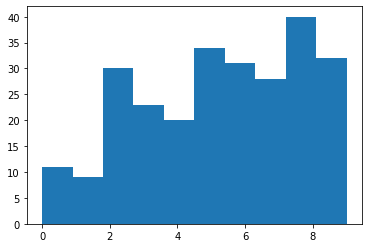

In [ ]:
 # put your code here
incorrect = []
for i in range(len(y_pred)):
    if y_test[i] != y_pred[i]:
        incorrect.append(y_test[i])
plt.hist(incorrect,bins=10)

<font color='#FF9700'><strong>(T.2.8)</font><em> According to the above histogram find three most difficult digits to recognize.

Let us present part of testing samples that are incorrectly classified. Below code present the difficult digits and what was the output of NN and real value of testing case

In [ ]:
y_bad = np.arange(10000)
y_bad = y_bad[y_pred!=y_test]

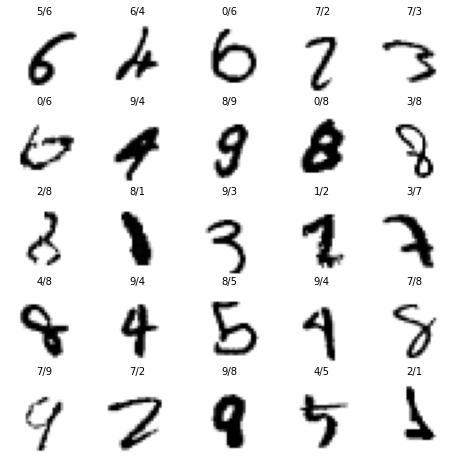

In [ ]:
plt.figure(figsize=(8,8))
for i,j in zip(y_bad[:25],np.arange(25)+1):
    plt.subplot(5,5,j)
    plt.imshow(X_test[i],cmap='gray_r')
    plt.axis('off')
    plt.title('%1d/%1d' %(y_pred[i],y_test[i]),fontsize=10)
plt.show()